In [24]:
import numpy as np
import pandas as pd

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [26]:
train = pd.read_csv('titanic_train.csv')

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


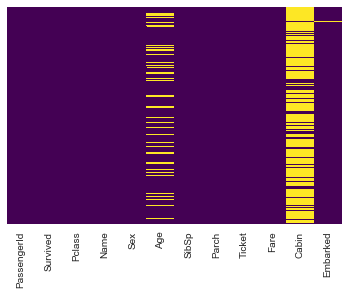

In [29]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

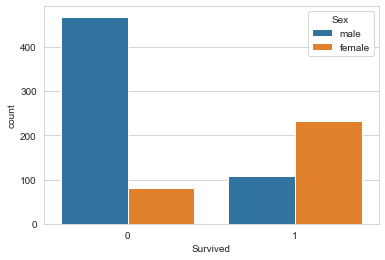

In [30]:
sns.countplot(data =train, x='Survived', hue='Sex')

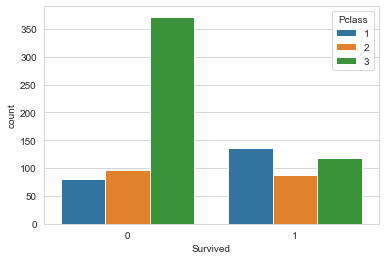

In [31]:
sns.countplot(data =train, x='Survived', hue='Pclass')

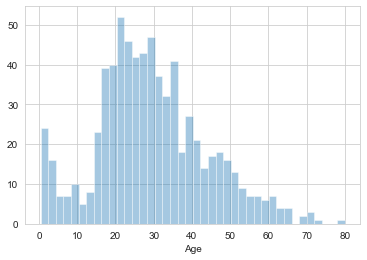

In [32]:
sns.distplot(train['Age'].dropna(), kde=False, bins=40)

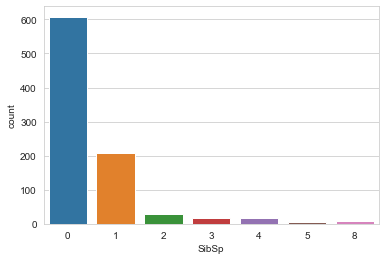

In [33]:
sns.countplot(data=train, x='SibSp')

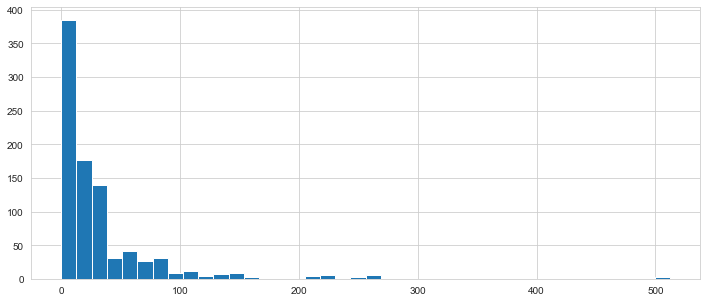

In [34]:
train['Fare'].hist(bins=40, figsize=(12,5))

In [35]:
import cufflinks as cf
cf.go_offline()

In [36]:
train['Fare'].iplot(kind='hist', bins=40)

In [37]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [38]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

In [39]:
train.drop('Cabin', axis=1, inplace=True)

In [40]:
train.dropna(inplace=True)

In [41]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [42]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [43]:
train = pd.concat([train, sex, embark], axis=1)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [45]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [46]:
train.head() 

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [51]:
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y = train['Survived']

In [52]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logmodel = LogisticRegression(max_iter=500)

In [71]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
predicitons = logmodel.predict(X_test)

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test, predicitons))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       174
           1       0.83      0.68      0.75       120

    accuracy                           0.81       294
   macro avg       0.82      0.79      0.80       294
weighted avg       0.81      0.81      0.81       294



In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y_test, predicitons)

array([[157,  17],
       [ 38,  82]], dtype=int64)